<a href="https://colab.research.google.com/github/VikasSingh-DS/BangaloreZomato-Data-Analysis-and-Pipeline-Modeling/blob/master/Zomato_Eda%20and%20Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Importing Packages and Collecting Data

In [0]:
'''Import basic modules'''
import pandas as pd
import numpy as np

'''import visualization tools'''
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [0]:
'''Read in train and test data from csv files'''
data = pd.read_excel('/content/drive/My Drive/zomato_train.xlsx')
data.head()

,url,address,name,online_order,book_table,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),rates
0,https://www.zomato.com/bangalore/al-swaad-take...,"18, Masjid Street, Opp Akbari Masjid Neelasand...",Al Swaad Take Away,Yes,No,13,+91 7019942388\n+91 9902335220,Richmond Road,Quick Bites,NaN,"North Indian, South Indian, Arabian",350,"[('Rated 1.0', 'RATED\n If U need reasonable ...","['Beef Seekh Kabab', 'Beef BBQ Chops', 'Beef M...",Delivery,Residency Road,3.1
1,https://www.zomato.com/bangalore/the-boozy-gri...,"2nd Floor, 1st A Cross Road, Jyothi Nivas Coll...",The Boozy Griffin,No,Yes,5015,080 33512954,Koramangala 5th Block,"Casual Dining, Pub","Cocktails, Craft Beer, Salads, Devils Chicken,...","European, Continental","1,800","[('Rated 5.0', 'RATED\n Really great ambience...",[],Dine-out,Koramangala 6th Block,4.6
2,https://www.zomato.com/bangalore/barkat-btm-ba...,"28th, 8th Cross, Maruthi Nagar, Madiwala, BTM,...",Barkat,No,No,6,+91 9019670836,BTM,Quick Bites,NaN,Kerala,250,[],[],Dine-out,Koramangala 4th Block,3.4
3,https://www.zomato.com/bangalore/sriracha-lave...,"204, 2nd Level, 4th Floor, Comet Block, UB Cit...",Sriracha,No,No,699,+91 8041755366\n+91 7022422473,Lavelle Road,Casual Dining,"Noodles, Laksa, Cocktails, Dumplings, Sangria,...","Thai, Chinese, Indonesian, Asian, Momos","1,500","[('Rated 3.0', 'RATED\n Another restaurant in...",[],Dine-out,Residency Road,4.3
4,https://www.zomato.com/bangalore/sri-ganesh-ju...,"513, Opposite Ganesh Temple, Koramangala 8th B...",Sri Ganesh Juice Junction,Yes,No,129,+91 9845623889,Koramangala 8th Block,Beverage Shop,NaN,"Juices, Fast Food",150,"[('Rated 4.0', 'RATED\n Good cafe with most v...","['Dry Fruit Milkshake', 'Wheat Grass with Wate...",Delivery,Koramangala 6th Block,3.7


In [0]:
'''Variable Description'''
def description(df):
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values    
    summary['Uniques'] = df.nunique().values
    summary['First Value'] = df.iloc[0].values
    summary['Second Value'] = df.iloc[1].values
    summary['Third Value'] = df.iloc[2].values
    return summary
description(data)

,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value
0,url,object,0,41373,https://www.zomato.com/bangalore/al-swaad-take...,https://www.zomato.com/bangalore/the-boozy-gri...,https://www.zomato.com/bangalore/barkat-btm-ba...
1,address,object,0,11012,"18, Masjid Street, Opp Akbari Masjid Neelasand...","2nd Floor, 1st A Cross Road, Jyothi Nivas Coll...","28th, 8th Cross, Maruthi Nagar, Madiwala, BTM,..."
2,name,object,0,8487,Al Swaad Take Away,The Boozy Griffin,Barkat
3,online_order,object,0,2,Yes,No,No
4,book_table,object,0,2,No,Yes,No
5,votes,int64,0,2203,13,5015,6
6,phone,object,971,12126,+91 7019942388\n+91 9902335220,080 33512954,+91 9019670836
7,location,object,15,93,Richmond Road,Koramangala 5th Block,BTM
8,rest_type,object,175,93,Quick Bites,"Casual Dining, Pub",Quick Bites
9,dish_liked,object,22472,5026,NaN,"Cocktails, Craft Beer, Salads, Devils Chicken,...",NaN


# Data Cleaning

In [0]:
"""Droping unnecessary variables"""
data.drop(columns=['url','dish_liked','phone', 'address','name','reviews_list','menu_item'],axis=1, inplace=True)
data.drop_duplicates(keep='first',inplace=True)
data.dropna(how='any',inplace=True)

In [0]:
"""Changing the Columns Names"""
data = data.rename(columns={'approx_cost(for two people)':'cost','listed_in(type)':'Service_type',
                                  'listed_in(city)':'city'})
data.columns

Index(['online_order', 'book_table', 'votes', 'location', 'rest_type',
       'cuisines', 'cost', 'Service_type', 'city', 'rates'],
      dtype='object')

In [0]:
"""Some Transformations"""
data['cost'] = data['cost'].astype(str)
data['cost'] = data['cost'].apply(lambda x: x.replace(',','.'))
data['cost'] = data['cost'].astype(float)

data = data.loc[data.rates !='-'].reset_index(drop=True)
data['rates'] = data['rates'].astype(float)

In [0]:
data['restuarant_type'] = data['rest_type'].str.extract('([a-zA-Z ]+)', expand=False).str.strip()
data['cuisines_type'] = data['cuisines'].str.extract('([a-zA-Z ]+)', expand=False).str.strip()

# EDA

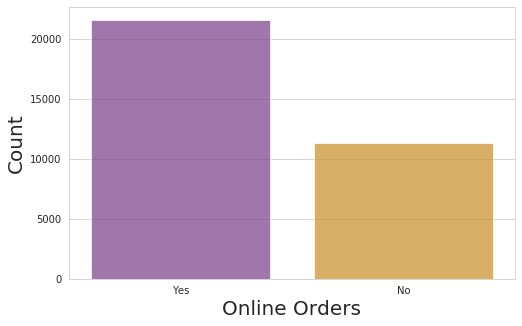

In [0]:
"""share of online orders"""
plt.rcParams['figure.figsize'] = (8, 5)
ax = sns.countplot(data['online_order'], palette = 'CMRmap', alpha = 0.7)
ax.set_ylabel('Count', fontsize = 20)
ax.set_xlabel('Online Orders', fontsize = 20)
plt.show()

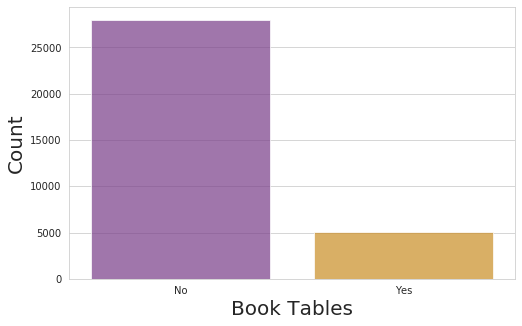

In [0]:
"""share of book tables"""
plt.rcParams['figure.figsize'] = (8, 5)
ax = sns.countplot(data['book_table'], palette = 'CMRmap', alpha = 0.7)
ax.set_ylabel('Count', fontsize = 20)
ax.set_xlabel('Book Tables', fontsize = 20)
plt.show()

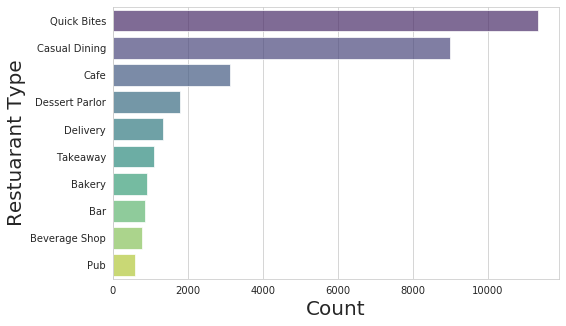

In [0]:
"""Top 10 Restuarant Type"""
plt.rcParams['figure.figsize'] = (8, 5)
temp = data['restuarant_type'].value_counts().reset_index()
ax = sns.barplot(data = temp[:10], y = 'index', x='restuarant_type', palette = 'viridis', alpha = 0.7)
ax.set_xlabel('Count', fontsize = 20)
ax.set_ylabel('Restuarant Type', fontsize = 20)
plt.show()

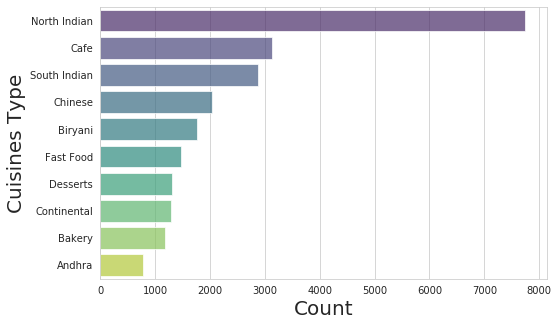

In [0]:
"""Top 10 Cuisiness Type"""
plt.rcParams['figure.figsize'] = (8, 5)
temp = data['cuisines_type'].value_counts().reset_index()
ax = sns.barplot(data = temp[:10], y = 'index', x='cuisines_type', palette = 'viridis', alpha = 0.7)
ax.set_xlabel('Count', fontsize = 20)
ax.set_ylabel('Cuisines Type', fontsize = 20)
plt.show()

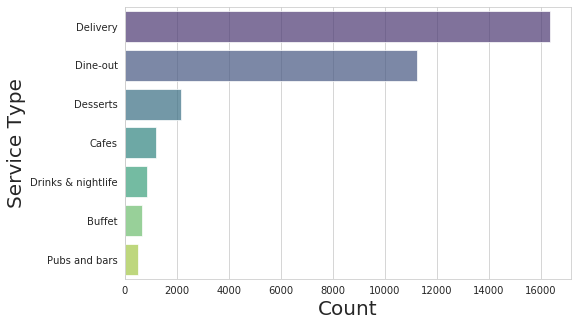

In [0]:
plt.rcParams['figure.figsize'] = (8, 5)
temp = data['Service_type'].value_counts().reset_index()
ax = sns.barplot(data = temp, y = 'index', x='Service_type', palette = 'viridis', alpha = 0.7)
ax.set_xlabel('Count', fontsize = 20)
ax.set_ylabel('Service Type', fontsize = 20)
plt.show()

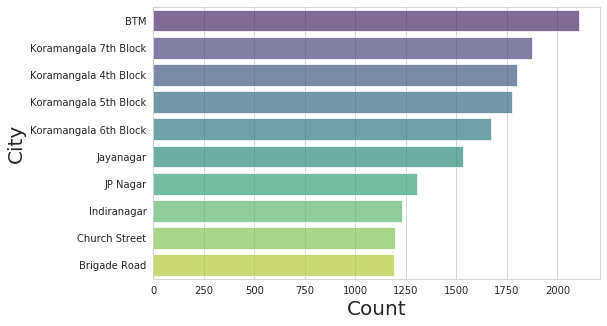

In [0]:
"""Top 10 City with max restuarate"""
plt.rcParams['figure.figsize'] = (8, 5)
temp = data['city'].value_counts().reset_index()
ax = sns.barplot(data = temp[:10], y = 'index', x='city', palette = 'viridis', alpha = 0.7)
ax.set_xlabel('Count', fontsize = 20)
ax.set_ylabel('City', fontsize = 20)
plt.show()

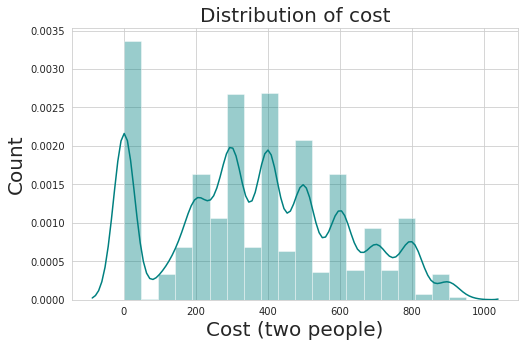

In [0]:
plt.rcParams['figure.figsize'] = (8, 5)
ax = sns.distplot(data['cost'],color='teal',bins=20)
ax.set_xlabel('Cost (two people)', fontsize = 20)
ax.set_ylabel('Count', fontsize = 20)
ax.set_title('Distribution of cost', fontsize=20)
plt.show()

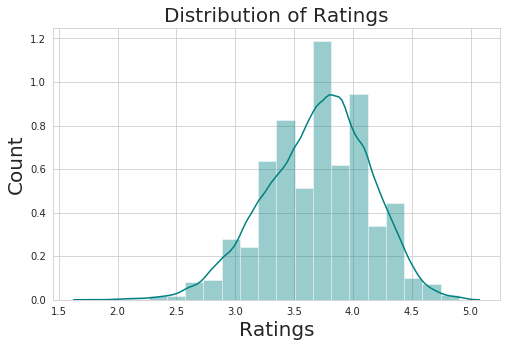

In [0]:
plt.rcParams['figure.figsize'] = (8, 5)
ax = sns.distplot(data['rates'],color='teal',bins=20)
ax.set_xlabel('Ratings', fontsize = 20)
ax.set_ylabel('Count', fontsize = 20)
ax.set_title('Distribution of Ratings', fontsize=20)
plt.show()

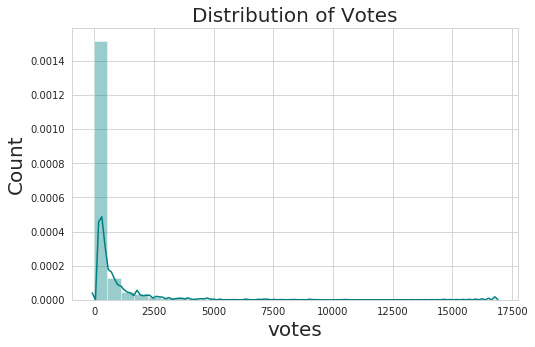

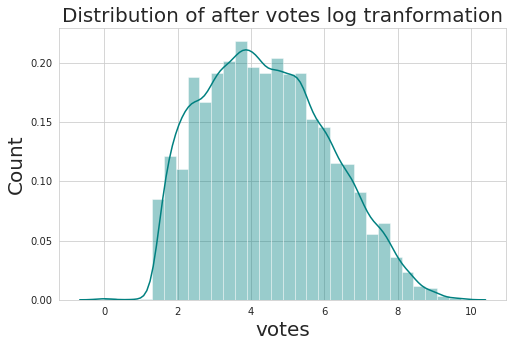

In [0]:
plt.rcParams['figure.figsize'] = (8, 5)
ax = sns.distplot(data['votes'],color='teal',bins=30)
ax.set_xlabel('votes', fontsize = 20)
ax.set_ylabel('Count', fontsize = 20)
ax.set_title('Distribution of Votes', fontsize=20)
plt.show()

data['votes'] = np.log1p(data['votes'])
plt.rcParams['figure.figsize'] = (8, 5)
ax = sns.distplot(data['votes'],color='teal',bins=30)
ax.set_xlabel('votes', fontsize = 20)
ax.set_ylabel('Count', fontsize = 20)
ax.set_title('Distribution of after votes log tranformation', fontsize=20)
plt.show()

# Model Building & Evaluation

In [0]:
'''Importing the auxiliar and preprocessing librarys'''
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV, KFold, StratifiedKFold, cross_val_score, train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

'''Initialize all the regression models object we are interested in.'''
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

In [0]:
"""Setting up X and y"""
X = data[['online_order', 'book_table', 'votes', 'restuarant_type','cuisines_type', 'cost', 'Service_type', 'city']]
y = data['rates']

# Divide data into training and validation subsets
X_train_full, X_valid_full, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,random_state=101)

# "Cardinality" means the number of unique values in a column
# Select categorical columns with relatively low cardinality (convenient but arbitrary)
categorical_cols = [cname for cname in X_train_full.columns if X_train_full[cname].dtype == "object"]
# Select categorical columns with relatively high cardinality (convenient but arbitrary)

# Select numerical columns
numerical_cols = [cname for cname in X_train_full.columns if X_train_full[cname].dtype in ['int64', 'float64']]

# Keep selected columns only
my_cols = categorical_cols + numerical_cols
X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()

In [0]:
"""Let's have a final look at our data"""
print('Input matrix dimension:', X_train.shape)
print('Output vector dimension:',y_train.shape)
print('Test data dimension:', X_valid.shape)

Input matrix dimension: (26372, 8)
Output vector dimension: (26372,)
Test data dimension: (6594, 8)


In [0]:
# Preprocessing for numerical data
numerical_transformer = MinMaxScaler()

# Preprocessing for categorical data
onehot_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('oe', onehot_transformer, categorical_cols)
    ])

In [0]:
'''Spot-Check Algorithms'''
def GetBasedModel():
    basedModels = []
    
    basedModels.append(('LR',
                        Pipeline([('preprocessor', preprocessor), 
                                   ('LR', LinearRegression())])))
    basedModels.append(('RC',
                        Pipeline([('preprocessor', preprocessor),
                                   ('RC', Ridge())])))

    basedModels.append(('DT' , 
                        Pipeline([('preprocessor', preprocessor),
                                  ('DT', DecisionTreeRegressor())])))
    basedModels.append(('GBM', 
                         Pipeline([('preprocessor', preprocessor),
                                   ('GBM',GradientBoostingRegressor())])))
    basedModels.append(('RF' , 
                        Pipeline([('preprocessor', preprocessor),
                                  ('RF',RandomForestRegressor())])))
    basedModels.append(('ET' , 
                         Pipeline([('preprocessor', preprocessor),
                                   ('ET', ExtraTreesRegressor())])))
    #basedModels.append(('XGB'   , XGBClassifier()))
    
    return basedModels

'''Test options and evaluation metric'''
def BasedLine(X_train, y_train, models):
    num_folds = 5
    scoring = 'neg_mean_squared_error'

    results, names = [], []

    for name, model in models:
        cv_results = cross_val_score(model, X_train, y_train, cv = num_folds, 
                                scoring = scoring, n_jobs = -1)
        names.append(name)
        results.append(np.sqrt(-1 * cv_results))
        msg = "%s: %f (+/- %f)" % (name, np.sqrt(-1 * cv_results).mean(),  
                                   np.sqrt(-1 * cv_results).std())
        print(msg)
    
    return names, results

In [0]:
models = GetBasedModel()
names,results = BasedLine(X_train, y_train,models)

LR: 0.313150 (+/- 0.006963)
RC: 0.313343 (+/- 0.007037)
DT: 0.261350 (+/- 0.008296)
GBM: 0.304840 (+/- 0.007313)


/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


RF: 0.205984 (+/- 0.006911)
ET: 0.213720 (+/- 0.007701)


In [0]:
seed = 44
def grid_search_cv(model, params):
    global best_params, best_score
    grid_search = GridSearchCV(estimator = model, param_grid = params, cv = 10, verbose = 3,
                             scoring = 'neg_mean_squared_error', n_jobs = -1)
    grid_search.fit(X_train, y_train)
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    
    return best_params, best_score

In [0]:
# Optimizing best scored model
'''Define hyperparameters of ExtraTreesRegressor.'''
RC_model = Pipeline([('preprocessor', preprocessor),
                                   ('RC', Ridge())])
RC_params = {'RC__alpha':[0.5, 2.5, 3.3, 5, 5.5, 7, 9, 9.5, 9.52, 9.64, 9.7, 
                      9.8, 9.9, 10, 10.5,10.62,10.85, 20, 30],
             'RC__random_state': [seed]}

grid_search_cv(RC_model, RC_params)
RC_best_params, RC_best_score = best_params, best_score
print('RC best params:{} & best_score:{:0.5f}' .format(RC_best_params, RC_best_score))

Fitting 10 folds for each of 19 candidates, totalling 190 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:   14.8s


RC best params:{'RC__alpha': 0.5, 'RC__random_state': 44} & best_score:-0.09820


[Parallel(n_jobs=-1)]: Done 190 out of 190 | elapsed:   21.5s finished


In [0]:
rc = Pipeline([('preprocessor', preprocessor),
                                   ('RC', Ridge(alpha = 0.5))])
rc.fit(X_train,y_train)
pred = rc.predict(X_valid)
pred = np.round(pred,1)
from sklearn.metrics import r2_score
r2_score(y_valid, pred)

0.4933919433320044

In [0]:
pred

array([3.9, 3.3, 3.5, ..., 3.3, 3.8, 3.2])